### This notebook presented the important features for annual renewable energy consumption from Random Forest Regressor

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df = pd.read_csv('data/data_4.csv',index_col=[0],parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 1949-01-01 to 2017-01-01
Data columns (total 18 columns):
total-renewable-consumption                              69 non-null float64
total-renewable-production                               69 non-null float64
Hydroelectric-power                                      69 non-null float64
Hydroelectric-power-Con-Pro                              69 non-null float64
Geothermal_Energy_Consumption_per_Production             69 non-null float64
Geothermal_Energy_Consumption_by_the_Electric_Power      69 non-null float64
Solar_per_PV_Energy_Consumption_per_Production           69 non-null float64
Total_Biomass_Energy_Consumed_by_the_Electric_Power      69 non-null float64
Total_Biomass_Energy_Production                          69 non-null float64
Total_Renewable_Energy_Consumed_by_the_Electric_Power    69 non-null float64
Waste_Consumption_for_Electricity                        69 non-null float64
Wind_Energy_Consumed_by_the_El

In [3]:
df = df.dropna()

In [4]:
features = pd.DataFrame(df.columns)

In [5]:
df.head()

,total-renewable-consumption,total-renewable-production,Hydroelectric-power,Hydroelectric-power-Con-Pro,Geothermal_Energy_Consumption_per_Production,Geothermal_Energy_Consumption_by_the_Electric_Power,Solar_per_PV_Energy_Consumption_per_Production,Total_Biomass_Energy_Consumed_by_the_Electric_Power,Total_Biomass_Energy_Production,Total_Renewable_Energy_Consumed_by_the_Electric_Power,Waste_Consumption_for_Electricity,Wind_Energy_Consumed_by_the_Electric_Power,Wind_Energy_Consumption_per_Production,Wood_Consumption_for_Electricity,Biomass_Exports,Biomass_Imports,Biofuels_Consumption,Biofuels_Production
Year,,,,,,,,,,,,,,,,,,
1949-01-01,2973.984,2973.984,1349.185,1424.722,0.0,0.0,0.0,5.803,1549.262,1354.988,0.0,0.0,0.0,5.803,0.0,0.0,0.0,0.0
1950-01-01,2977.718,2977.718,1346.015,1415.411,0.0,0.0,0.0,5.466,1562.307,1351.481,0.0,0.0,0.0,5.466,0.0,0.0,0.0,0.0
1951-01-01,2958.464,2958.464,1360.698,1423.795,0.0,0.0,0.0,5.331,1534.669,1366.029,0.0,0.0,0.0,5.331,0.0,0.0,0.0,0.0
1952-01-01,2940.181,2940.181,1404.274,1465.812,0.0,0.0,0.0,6.435,1474.369,1410.709,0.0,0.0,0.0,6.435,0.0,0.0,0.0,0.0
1953-01-01,2831.460,2831.460,1356.353,1412.859,0.0,0.0,0.0,5.019,1418.601,1361.372,0.0,0.0,0.0,5.019,0.0,0.0,0.0,0.0


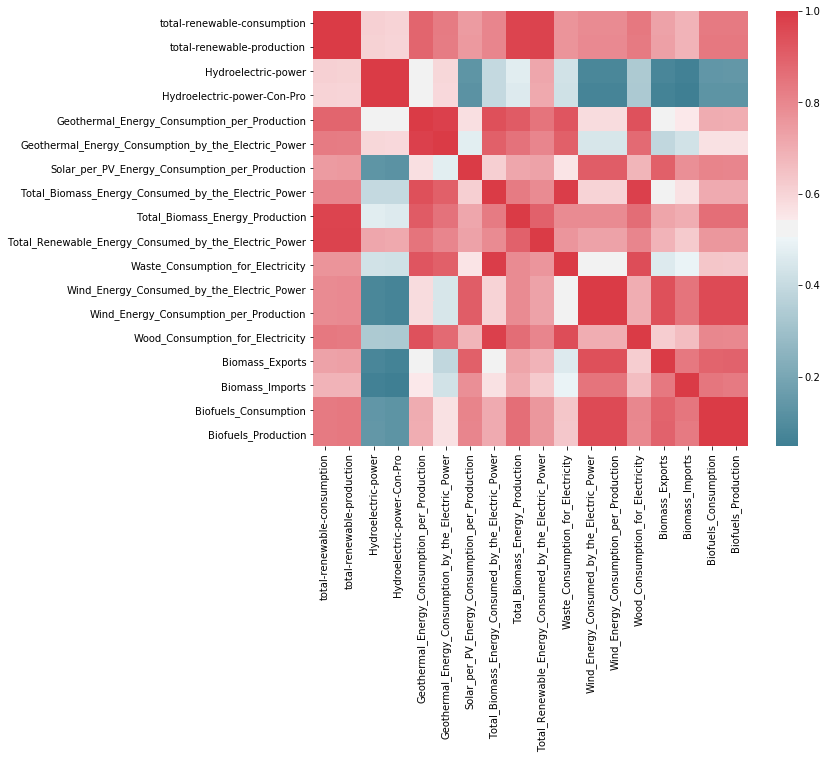

In [6]:
plt.figure(figsize=(10, 8))
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns.values, 
            yticklabels=corr_df.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square = True)

## Scale data

In [7]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
df_scaled = pd.DataFrame(sc_x.fit_transform(df), index=df.index, columns=df.columns)
df_scaled.head()

,total-renewable-consumption,total-renewable-production,Hydroelectric-power,Hydroelectric-power-Con-Pro,Geothermal_Energy_Consumption_per_Production,Geothermal_Energy_Consumption_by_the_Electric_Power,Solar_per_PV_Energy_Consumption_per_Production,Total_Biomass_Energy_Consumed_by_the_Electric_Power,Total_Biomass_Energy_Production,Total_Renewable_Energy_Consumed_by_the_Electric_Power,Waste_Consumption_for_Electricity,Wind_Energy_Consumed_by_the_Electric_Power,Wind_Energy_Consumption_per_Production,Wood_Consumption_for_Electricity,Biomass_Exports,Biomass_Imports,Biofuels_Consumption,Biofuels_Production
Year,,,,,,,,,,,,,,,,,,
1949-01-01,-1.187533,-1.182906,-1.793870,-1.739610,-1.099899,-1.156581,-0.450161,-0.830606,-0.871872,-1.465701,-0.845068,-0.426654,-0.426581,-0.783336,-0.373426,-0.414743,-0.553599,-0.550672
1950-01-01,-1.185714,-1.181097,-1.798934,-1.754560,-1.099899,-1.156581,-0.450161,-0.832201,-0.860245,-1.468860,-0.845068,-0.426654,-0.426581,-0.787317,-0.373426,-0.414743,-0.553599,-0.550672
1951-01-01,-1.195095,-1.190423,-1.775475,-1.741099,-1.099899,-1.156581,-0.450161,-0.832841,-0.884879,-1.455756,-0.845068,-0.426654,-0.426581,-0.788912,-0.373426,-0.414743,-0.553599,-0.550672
1952-01-01,-1.204004,-1.199278,-1.705854,-1.673638,-1.099899,-1.156581,-0.450161,-0.827613,-0.938626,-1.415509,-0.845068,-0.426654,-0.426581,-0.775869,-0.373426,-0.414743,-0.553599,-0.550672
1953-01-01,-1.256977,-1.251936,-1.782417,-1.758657,-1.099899,-1.156581,-0.450161,-0.834318,-0.988333,-1.459951,-0.845068,-0.426654,-0.426581,-0.792598,-0.373426,-0.414743,-0.553599,-0.550672


In [8]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 1949-01-01 to 2017-01-01
Data columns (total 18 columns):
total-renewable-consumption                              69 non-null float64
total-renewable-production                               69 non-null float64
Hydroelectric-power                                      69 non-null float64
Hydroelectric-power-Con-Pro                              69 non-null float64
Geothermal_Energy_Consumption_per_Production             69 non-null float64
Geothermal_Energy_Consumption_by_the_Electric_Power      69 non-null float64
Solar_per_PV_Energy_Consumption_per_Production           69 non-null float64
Total_Biomass_Energy_Consumed_by_the_Electric_Power      69 non-null float64
Total_Biomass_Energy_Production                          69 non-null float64
Total_Renewable_Energy_Consumed_by_the_Electric_Power    69 non-null float64
Waste_Consumption_for_Electricity                        69 non-null float64
Wind_Energy_Consumed_by_the_El

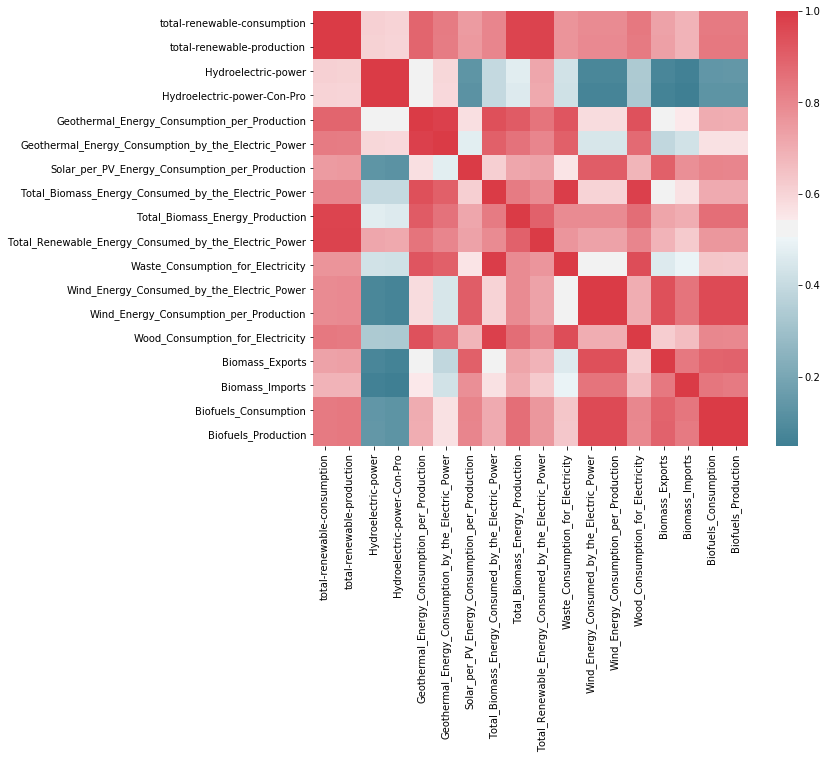

In [9]:
plt.figure(figsize=(10, 8))
corr_dfscale = df_scaled.corr()
sns.heatmap(corr_dfscale, xticklabels=corr_dfscale.columns.values, 
            yticklabels=corr_dfscale.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square = True)

## Stationary test

In [10]:
# Perform Dickey-fuller test  for stationality

from statsmodels.tsa.stattools import adfuller

for i in df_scaled.columns: 
    x = df_scaled[i].values
    result = adfuller(x)
    print('\033[1m' + i + '\033[0m')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('')

total-renewable-consumption
ADF Statistic: 1.6563030363669502
p-value: 0.9980170334569259

total-renewable-production
ADF Statistic: 1.719890674530744
p-value: 0.9981761652300903

Hydroelectric-power
ADF Statistic: -2.2241555973114617
p-value: 0.19759545815213314

Hydroelectric-power-Con-Pro
ADF Statistic: -2.207806582580488
p-value: 0.20342432832684643

Geothermal_Energy_Consumption_per_Production
ADF Statistic: 0.024147928619816707
p-value: 0.9604841222277227

Geothermal_Energy_Consumption_by_the_Electric_Power
ADF Statistic: -0.6339111982741127
p-value: 0.8631339267576387

Solar_per_PV_Energy_Consumption_per_Production
ADF Statistic: 2.986898603424296
p-value: 1.0

Total_Biomass_Energy_Consumed_by_the_Electric_Power
ADF Statistic: -0.3053975400815507
p-value: 0.9247363925790428

Total_Biomass_Energy_Production
ADF Statistic: 0.3523634404598539
p-value: 0.9796233882233668

Total_Renewable_Energy_Consumed_by_the_Electric_Power
ADF Statistic: 0.3755642075430776
p-value: 0.9805577703806

## Make a differencing

In [11]:
diff = df_scaled.diff().dropna()
diff.head()

,total-renewable-consumption,total-renewable-production,Hydroelectric-power,Hydroelectric-power-Con-Pro,Geothermal_Energy_Consumption_per_Production,Geothermal_Energy_Consumption_by_the_Electric_Power,Solar_per_PV_Energy_Consumption_per_Production,Total_Biomass_Energy_Consumed_by_the_Electric_Power,Total_Biomass_Energy_Production,Total_Renewable_Energy_Consumed_by_the_Electric_Power,Waste_Consumption_for_Electricity,Wind_Energy_Consumed_by_the_Electric_Power,Wind_Energy_Consumption_per_Production,Wood_Consumption_for_Electricity,Biomass_Exports,Biomass_Imports,Biofuels_Consumption,Biofuels_Production
Year,,,,,,,,,,,,,,,,,,
1950-01-01,0.001819,0.001809,-0.005065,-0.014949,0.0,0.0,0.0,-0.001596,0.011627,-0.003159,0.0,0.0,0.0,-0.003981,0.0,0.0,0.0,0.0
1951-01-01,-0.009381,-0.009326,0.023459,0.013461,0.0,0.0,0.0,-0.000639,-0.024634,0.013105,0.0,0.0,0.0,-0.001595,0.0,0.0,0.0,0.0
1952-01-01,-0.008908,-0.008855,0.069621,0.067461,0.0,0.0,0.0,0.005228,-0.053746,0.040247,0.0,0.0,0.0,0.013043,0.0,0.0,0.0,0.0
1953-01-01,-0.052973,-0.052658,-0.076563,-0.085020,0.0,0.0,0.0,-0.006705,-0.049707,-0.044442,0.0,0.0,0.0,-0.016729,0.0,0.0,0.0,0.0
1954-01-01,-0.037693,-0.037469,-0.083494,-0.085235,0.0,0.0,0.0,-0.008571,-0.021636,-0.048704,0.0,0.0,0.0,-0.021383,0.0,0.0,0.0,0.0


In [12]:
for i in diff.columns: 
    x = diff[i].values
    result = adfuller(x)
    print('\033[1m' + i + '\033[0m')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('')

total-renewable-consumption
ADF Statistic: -7.625934809150868
p-value: 2.0687514978521278e-11

total-renewable-production
ADF Statistic: -7.541929515234532
p-value: 3.360351598843024e-11

Hydroelectric-power
ADF Statistic: -9.08363778141009
p-value: 3.994033062342852e-15

Hydroelectric-power-Con-Pro
ADF Statistic: -9.00880486361368
p-value: 6.206056962658774e-15

Geothermal_Energy_Consumption_per_Production
ADF Statistic: -7.18662618552019
p-value: 2.5668240180173465e-10

Geothermal_Energy_Consumption_by_the_Electric_Power
ADF Statistic: -6.94507469545709
p-value: 1.0020626139845385e-09

Solar_per_PV_Energy_Consumption_per_Production
ADF Statistic: 5.92427593653281
p-value: 1.0

Total_Biomass_Energy_Consumed_by_the_Electric_Power
ADF Statistic: -6.458121727210893
p-value: 1.4660208572813538e-08

Total_Biomass_Energy_Production
ADF Statistic: -1.3767451978195326
p-value: 0.5933726023144235

Total_Renewable_Energy_Consumed_by_the_Electric_Power
ADF Statistic: -8.249221071545227
p-value: 

## Final data

In [13]:
data = diff.drop(axis=1,columns=['Solar_per_PV_Energy_Consumption_per_Production','Total_Biomass_Energy_Production','Wind_Energy_Consumption_per_Production',
   'Wind_Energy_Consumed_by_the_Electric_Power','Biomass_Imports'])
data.head()

,total-renewable-consumption,total-renewable-production,Hydroelectric-power,Hydroelectric-power-Con-Pro,Geothermal_Energy_Consumption_per_Production,Geothermal_Energy_Consumption_by_the_Electric_Power,Total_Biomass_Energy_Consumed_by_the_Electric_Power,Total_Renewable_Energy_Consumed_by_the_Electric_Power,Waste_Consumption_for_Electricity,Wood_Consumption_for_Electricity,Biomass_Exports,Biofuels_Consumption,Biofuels_Production
Year,,,,,,,,,,,,,
1950-01-01,0.001819,0.001809,-0.005065,-0.014949,0.0,0.0,-0.001596,-0.003159,0.0,-0.003981,0.0,0.0,0.0
1951-01-01,-0.009381,-0.009326,0.023459,0.013461,0.0,0.0,-0.000639,0.013105,0.0,-0.001595,0.0,0.0,0.0
1952-01-01,-0.008908,-0.008855,0.069621,0.067461,0.0,0.0,0.005228,0.040247,0.0,0.013043,0.0,0.0,0.0
1953-01-01,-0.052973,-0.052658,-0.076563,-0.085020,0.0,0.0,-0.006705,-0.044442,0.0,-0.016729,0.0,0.0,0.0
1954-01-01,-0.037693,-0.037469,-0.083494,-0.085235,0.0,0.0,-0.008571,-0.048704,0.0,-0.021383,0.0,0.0,0.0


In [14]:
data.shape

(68, 13)

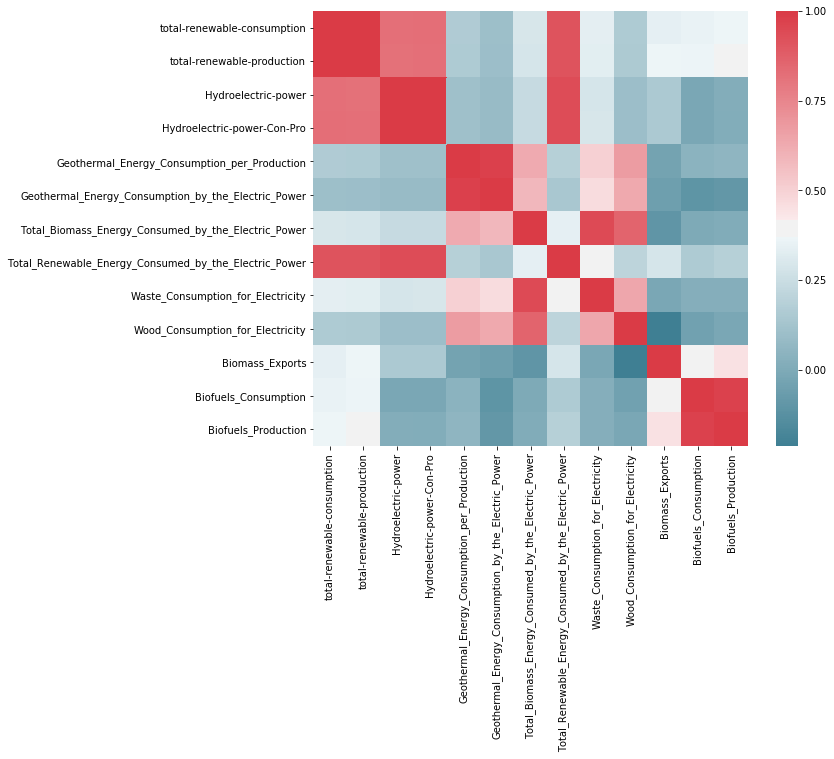

In [15]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square = True)

In [16]:
corr

,total-renewable-consumption,total-renewable-production,Hydroelectric-power,Hydroelectric-power-Con-Pro,Geothermal_Energy_Consumption_per_Production,Geothermal_Energy_Consumption_by_the_Electric_Power,Total_Biomass_Energy_Consumed_by_the_Electric_Power,Total_Renewable_Energy_Consumed_by_the_Electric_Power,Waste_Consumption_for_Electricity,Wood_Consumption_for_Electricity,Biomass_Exports,Biofuels_Consumption,Biofuels_Production
total-renewable-consumption,1.000000,0.998662,0.823787,0.824875,0.162535,0.102430,0.291141,0.918415,0.333950,0.158393,0.339918,0.353317,0.370198
total-renewable-production,0.998662,1.000000,0.819763,0.820437,0.161722,0.100533,0.286327,0.917742,0.328296,0.155978,0.368157,0.362620,0.389113
Hydroelectric-power,0.823787,0.819763,1.000000,0.999722,0.107176,0.085750,0.234965,0.941993,0.288609,0.098148,0.150402,-0.015404,0.018513
Hydroelectric-power-Con-Pro,0.824875,0.820437,0.999722,1.000000,0.105791,0.084720,0.236267,0.942161,0.290962,0.097520,0.148609,-0.016940,0.015232
Geothermal_Energy_Consumption_per_Production,0.162535,0.161722,0.107176,0.105791,1.000000,0.978789,0.629574,0.184846,0.506294,0.678039,-0.035750,0.040386,0.054019
Geothermal_Energy_Consumption_by_the_Electric_Power,0.102430,0.100533,0.085750,0.084720,0.978789,1.000000,0.585853,0.141846,0.469055,0.634184,-0.053240,-0.105592,-0.091292
Total_Biomass_Energy_Consumed_by_the_Electric_Power,0.291141,0.286327,0.234965,0.236267,0.629574,0.585853,1.000000,0.340465,0.944281,0.859214,-0.101956,-0.002895,0.007577
Total_Renewable_Energy_Consumed_by_the_Electric_Power,0.918415,0.917742,0.941993,0.942161,0.184846,0.141846,0.340465,1.000000,0.375795,0.208126,0.285900,0.157683,0.184394
Waste_Consumption_for_Electricity,0.333950,0.328296,0.288609,0.290962,0.506294,0.469055,0.944281,0.375795,1.000000,0.642947,-0.016431,0.022406,0.021927
Wood_Consumption_for_Electricity,0.158393,0.155978,0.098148,0.097520,0.678039,0.634184,0.859214,0.208126,0.642947,1.000000,-0.211713,-0.041567,-0.016453


## Split data

In [17]:
x_train = data.iloc[:44,1:]
y_train = pd.DataFrame(diff.iloc[:44,0])

x_test = data.iloc[44:,1:]
y_test = pd.DataFrame(diff.iloc[44:,0])

In [18]:
x_train.shape

(44, 12)

## Random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=5)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [20]:
print(rf.feature_importances_)

[8.17505263e-01 2.13668182e-02 5.97506081e-02 7.47158276e-03
 5.11241706e-03 1.68936337e-02 9.88365605e-03 3.12188408e-05
 4.03498087e-02 0.00000000e+00 1.45143706e-02 7.12062301e-03]


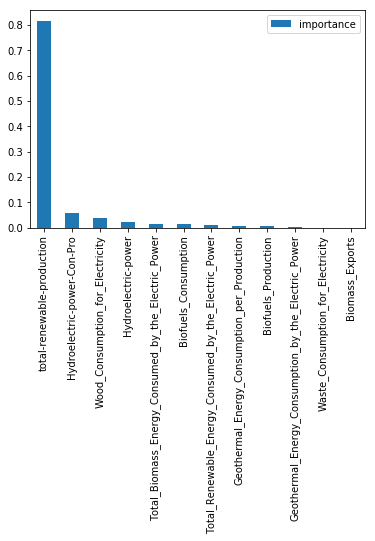

In [21]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')



(0, 0.04)

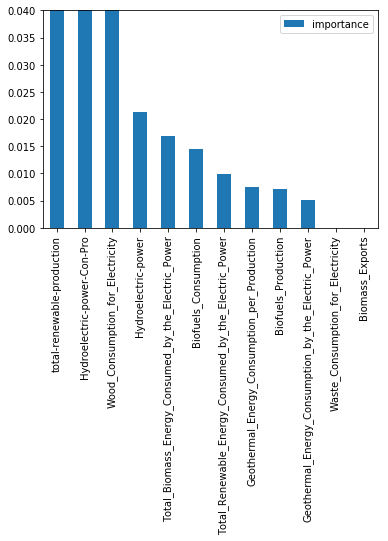

In [22]:
feature_importances.plot(kind='bar')
plt.ylim([0,0.04])

In [23]:
training_accuracy = rf.score(x_train, y_train)
test_accuracy = rf.score(x_test, y_test)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.971448
Accuracy on test data:     0.828098


In [24]:
feature_importances

,importance
total-renewable-production,0.817505
Hydroelectric-power-Con-Pro,0.059751
Wood_Consumption_for_Electricity,0.040350
Hydroelectric-power,0.021367
Total_Biomass_Energy_Consumed_by_the_Electric_Power,0.016894
Biofuels_Consumption,0.014514
Total_Renewable_Energy_Consumed_by_the_Electric_Power,0.009884
Geothermal_Energy_Consumption_per_Production,0.007472
Biofuels_Production,0.007121
Geothermal_Energy_Consumption_by_the_Electric_Power,0.005112


## Feature importances are total-renewable-production, Hydroelectric-power-Con-Pro	and Wood_Consumption_for_Electricity